atividade 3 
aluno : vilgledyson nobrega dos santos
professor : ricardo roberto 


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Transformando os dados em um DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)


df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Aplicando o LDA
lda = LDA(n_components=2)  # Reduzindo para 2 componentes
X_lda = lda.fit_transform(X_scaled, y)


print("Coeficientes do LDA:")
print(lda.coef_)


Coeficientes do LDA:
[[  5.21157831   5.27345252 -29.81560843 -15.77885735]
 [ -1.26370067  -1.90100128   8.26157263   2.32662354]
 [ -3.94787765  -3.37245124  21.5540358   13.45223381]]


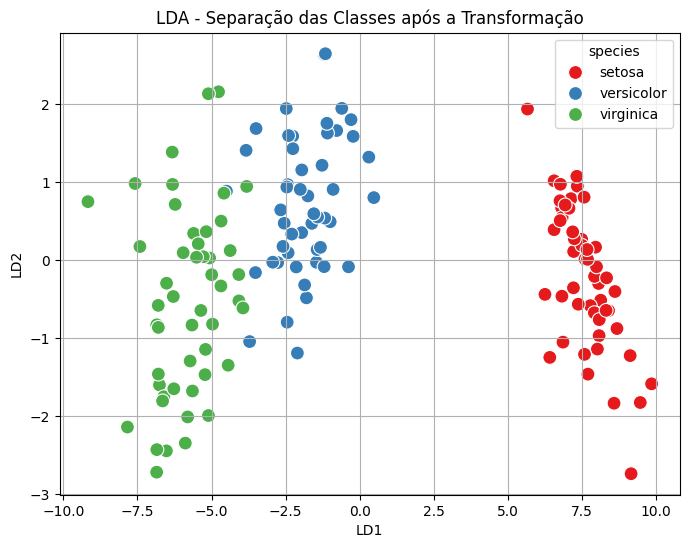

In [7]:
# Criando um DataFrame com os dados transformados
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['species'] = df['species']

# Visualizando os dados transformados
plt.figure(figsize=(8,6))
sns.scatterplot(x='LD1', y='LD2', hue='species', data=df_lda, palette='Set1', s=100)
plt.title('LDA - Separação das Classes após a Transformação')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.show()
